## Part 1: PCA and Variance Threshold in a Linear Regression
1. Import the housing data as a data frame and ensure that the data is loaded properly.
2. Drop the "Id" column and any features that are missing more than 40% of their values.
3. For numerical columns, fill in any missing data with the median value.
4. For categorical columns, fill in any missing data with the most common value (mode).
5. Convert the categorical columns to dummy variables.
6. Split the data into a training and test set, where the SalePrice column is the target.
7. Run a linear regression and report the R2-value and RMSE on the test set.
8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).
9. How many features are in the PCA-transformed matrix?
10. Transform but DO NOT fit the test features with the same PCA.
11. Repeat step 7 with your PCA transformed data.
12. Take your original training features (from step 6) and apply a min-max scaler to them.
13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).
14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
15. Repeat step 7 with the high variance data.
16. Summarize your findings.

### 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('housing_train.csv')

In [5]:
df.shape

(1460, 81)

### 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [7]:
null_count = df.isnull().sum()
pd.to_numeric(null_count)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
percent = 1460 * .4
print(percent)

584.0


In [9]:
null = null_count[null_count > 584]

In [10]:
null

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [11]:
tobedropped = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature','Id']

In [12]:
df.drop(tobedropped,axis=1,inplace=True)

In [13]:
df.shape

(1460, 74)

### 3. For numerical columns, fill in any missing data with the median value.
### 4. For categorical columns, fill in any missing data with the most common value (mode).

In [15]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [16]:
col_num = df.select_dtypes('number')
col_cat = df.select_dtypes('object')

In [17]:
df[col_num.columns] = col_num.fillna(col_num.mean())
df[col_cat.columns] = col_cat.fillna(col_cat.agg(lambda x: x.mode().values[0]))

In [18]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

### 5. Convert the categorical columns to dummy variables.

In [20]:
df_dummies = pd.get_dummies(df[col_cat.columns])

In [21]:
df.shape

(1460, 74)

In [22]:
df = df.drop(df[col_cat.columns],axis = 1)

In [23]:
df.shape

(1460, 37)

In [24]:
df = df.join(df_dummies)

In [25]:
df.shape

(1460, 267)

In [26]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


### 6. Split the data into a training and test set, where the SalePrice column is the target.

In [28]:

y = df['SalePrice']


In [29]:
x = df.drop('SalePrice', axis=1)

In [30]:
# x.to_csv('x.csv')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

### 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression().fit(x_train, y_train)

In [36]:
y_pred = model.predict(x_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2 = r2_score(y_test,y_pred)

In [39]:
r2

0.9078568330885358

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

25063.582037723107


### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [44]:
pca = PCA(n_components=90,whiten=True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

### 9. How many features are in the PCA-transformed matrix?

In [46]:
x_train_pca.shape,x_train.shape,x_test_pca.shape,x_test.shape

((1168, 90), (1168, 266), (292, 90), (292, 266))

this reduced the features from 266 to 90

### 10. Transform but DO NOT fit the test features with the same PCA.

oops I did this on step 8

### 11. Repeat step 7 with your PCA transformed data.

In [51]:
model2 = LinearRegression().fit(x_train_pca, y_train)

In [52]:
y_pred2 = model2.predict(x_test_pca)

In [53]:
r2 = r2_score(y_test,y_pred2)
print(r2)

0.8708654260989612


In [54]:
rmse = sqrt(mean_squared_error(y_test, y_pred2))
print(rmse)


29671.044793779623


### 12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [56]:
# import module
from sklearn.preprocessing import MinMaxScaler
 

scaler = MinMaxScaler()
model=scaler.fit(x_train)
scaled_train_data=model.transform(x_train)
scaled_test_data=model.transform(x_test)
# print scaled features
# print(scaled_train_data)

In [57]:
df_scaled_train = pd.DataFrame(scaled_train_data)



### 13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [59]:
from sklearn.feature_selection import VarianceThreshold

In [60]:

    var_thres=VarianceThreshold(threshold=0.1)
    var_thres.fit(df_scaled_train)
    new_cols = var_thres.get_support()
   

In [61]:
df_hv_train = df_scaled_train.iloc[:,new_cols]

In [62]:
df_hv_train.head()

,6,35,39,40,43,46,53,57,73,88,...,210,220,221,230,234,235,236,237,259,264
0,0.850000,0.25,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.316667,0.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.050000,0.00,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.950000,0.75,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.950000,0.75,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [63]:
df_hv_train.columns

Index([  6,  35,  39,  40,  43,  46,  53,  57,  73,  88, 103, 110, 113, 117,
       119, 136, 138, 142, 143, 151, 153, 158, 159, 163, 164, 169, 171, 172,
       178, 179, 184, 187, 188, 190, 193, 199, 206, 208, 210, 220, 221, 230,
       234, 235, 236, 237, 259, 264],
      dtype='int64')

### 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [65]:
df_hv_test = var_thres.transform(scaled_test_data)

### 15. Repeat step 7 with the high variance data.


In [67]:
hv_x_test = x_test.iloc[:,new_cols]

In [68]:
hv_x_train = x_train.iloc[:,new_cols]

In [69]:
hv_x_test.shape

(292, 48)

In [70]:
hv_x_train.shape

(1168, 48)

In [71]:
model = LinearRegression().fit(hv_x_train,y_train)

In [72]:
y_pred = model.predict(hv_x_test)

In [73]:
r2 = r2_score(y_test,y_pred)

In [74]:
r2

0.6046917816126323

In [75]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

51913.40246205555


### 16. Summarize your findings.

r2 0.9078568330885358
rmse 25063.582037723107

pca r2 0.8708654260989612
pca rmse 29671.044793779623

hv r2 0.6046917816126323
hv rmse 51913.40246205555


R2:  We see the highest r2 if the unaltered regression model.  This shows that the unaltered model can explain more variability.  I feel this is because there is more data overall
rmse:  Similarly we see that the lowes rmse is the unaltered model. Showing that this model is more accurate than the others.   


## Part 2: Categorical Feature Selection
1. Download the data from this link Mushroom Classification. Based on several categorical features, you will predict whether or not a mushroom is edible or poisonous.
2. Import the data as a data frame and ensure it is loaded correctly.
3. Convert the categorical features (all of them) to dummy variables.
4. Split the data into a training and test set.
5. Fit a decision tree classifier on the training set.
6. Report the accuracy and create a confusion matrix for the model prediction on the test set.
7. Create a visualization of the decision tree.
8. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
9. Which five features were selected in step 7? Hint: Use the get_support function.
10. Repeat steps 4 and 5 with the five best features selected in step 7.
11. Summarize your findings.

### 1. Download the data from this link Mushroom Classification. Based on several categorical features, you will predict whether or not a mushroom is edible or poisonous.

### 2. Import the data as a data frame and ensure it is loaded correctly.

In [81]:
df = pd.read_csv('mushrooms.csv')

In [82]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [83]:
df.shape

(8124, 23)

In [84]:

y = df['class']

In [85]:
x = df.drop('class', axis=1)

### 3. Convert the categorical features (all of them) to dummy variables.

In [87]:
df_dummies = pd.get_dummies(x)

In [88]:
df_dummies.shape

(8124, 117)

In [89]:
df_dummies.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [90]:
x = df_dummies

### 4. Split the data into a training and test set.

In [92]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

### 5. Fit a decision tree classifier on the training set.

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
dt = DecisionTreeClassifier()

In [240]:
 # Performing training clf_entropy.fit(X_train, y_train) return clf_entropy

In [242]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

### 6. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [246]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)

In [248]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [252]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[828,   0],
       [  0, 797]], dtype=int64)

### 7. Create a visualization of the decision tree.

In [254]:
import matplotlib.pyplot as plt
from sklearn import tree

<function matplotlib.pyplot.show(close=None, block=None)>

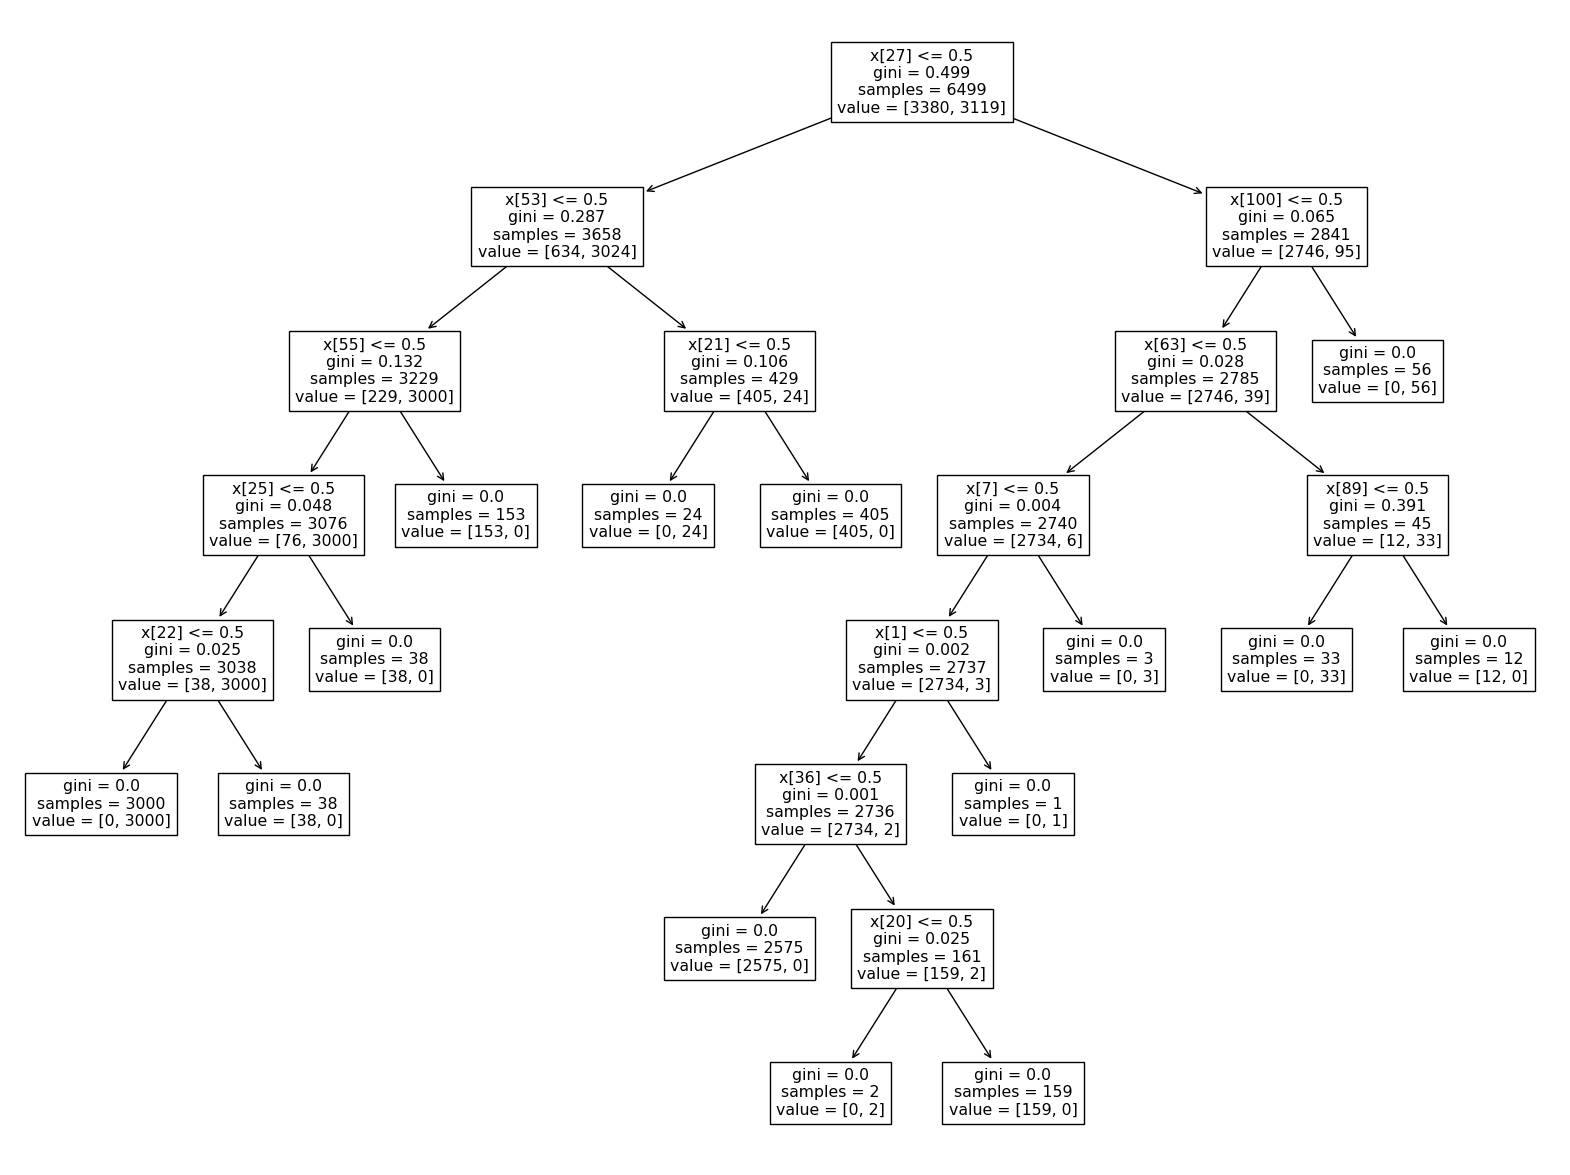

In [264]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(dt)
plt.show

### 8. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [284]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [286]:
selector = SelectKBest(chi2, k=5)
chi_x = selector.fit_transform (x,y)

In [288]:
chi_x

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False,  True, False, False, False],
       [False, False,  True, False,  True],
       [False,  True, False, False, False]])

### 9. Which five features were selected in step 7? Hint: Use the get_support function.

In [294]:
   new_cols = selector.get_support()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [305]:
top5_x = x.iloc[:,new_cols]

In [309]:
top5_x.columns

Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')

### 10. Repeat steps 4 and 5 with the five best features selected in step 7.

In [311]:
x_train, x_test, y_train, y_test= train_test_split(top5_x,y, test_size=0.2)

In [313]:
dt = DecisionTreeClassifier()

In [315]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [317]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)

In [319]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9298461538461539

In [321]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[848,   0],
       [114, 663]], dtype=int64)

### 11. Summarize your findings.

Looking soley at the accuracy the original decision tree appears to be more accurate.  I'm a bit concerned because in the teams thread I saw someone say that both their models resulted in perfect accuarcy but I had different results.  I also ran the original decison tree with entropy and that resulted in a less than perfect accuracy.  